In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Purpose

__The programme defines the class EnzymeKinetics which is used to solve models for enzymekinetics numerically with Euler forward. One model without an inhibitor is solved as well as a model with a competitive inhibitor.

# Reactions

\begin{equation}
E + S \underset{k2}{\stackrel{k1}{\rightleftharpoons}} ES \xrightarrow{k3} E + P
\end{equation}

\begin{equation}
E + I \underset{k5}{\stackrel{k4}{\rightleftharpoons}} EI
\end{equation}

# Class EnzymeKinetics
__The class EnzymeKinetics have rate constants and initial concentrations as parameters. The method Euler forward gives the integrated reactionrate for all species in the reactionmechanisms above. If the model without inhibitor is investigated the parameters regarding inhibitorkoncentration are set to 0. During simulations with the inhibitor only parameter I0 is changed.__

In [6]:
class EnzymeKinetics:
    def __init__(self, k1, k2, k3, k4, k5, S0, E0, A0, P0, I0, B0):
        self.k1 = k1
        self.k2 = k2
        self.k3 = k3
        self.k4 = k4
        self.k5 = k5
        
        self.S = [S0]
        self.E = [E0]
        self.A = [A0]
        self.P = [P0]
        self.I = [I0]
        self.B = [B0]
    
    def euler(self, dt):
        S = self.S[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1])
        E = self.E[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1] + self.k3*self.A[-1] - self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        A = self.A[-1] + dt*(self.k1*self.S[-1]*self.E[-1] - self.k2*self.A[-1] - self.k3*self.A[-1])
        P = self.P[-1] + dt*(self.k3*self.A[-1])
        I = self.I[-1] + dt*(-self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        B = self.B[-1] + dt*(self.k4*self.E[-1]*self.I[-1] - self.k5*self.B[-1])
        self.S.append(S)
        self.E.append(E)
        self.A.append(A)
        self.P.append(P)
        self.I.append(I)
        self.B.append(B)
        return self.S, self.E, self.A, self.P, self.I, self.B

        

# Definition av tidsintervall och plot-funktioner

In [7]:
N = 100 # number of intervalls.
tMax = 2000 #seconds.
t = np.linspace(0,tMax,N)
dt = tMax/N

In [8]:
def plot1(x):
    plt.rcdefaults()
    plt.rcParams.update({'font.sans-serif':'Times New Roman'})
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[ES]")
    plt.plot(t, EK.P, label="[P]")
    plt.xlabel("Time",fontsize=12)
    plt.ylabel("Concentration", fontsize=12)
    plt.title("Model without inhibitor with Enzymeconcentration " + str(round(EK.E[0],10)) + " M")
    plt.legend()
    print("Final product concentration " + str(EK.P[-1]))
    plt.savefig(x, bbox_inches="tight", pad_inches=1)

In [9]:
def plot2(x):
    plt.rcdefaults()
    plt.rcParams.update({'font.sans-serif':'Times New Roman'})
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[ES]")
    plt.plot(t, EK.P, label="[P]")
    plt.plot(t, EK.B, label="[B]")
    plt.plot(t, EK.I, label="[I]")
    plt.xlabel("Time",fontsize=12)
    plt.ylabel("Concentration", fontsize=12)
    plt.title("Model without inhibitor with Enzymeconcentration " + str(round(EK.E[0],10)) + " M and Inhibitorconcentration " + str(round(EK.I[0],10)) + " M")
    plt.legend()
    print("Final product concentration " + str(EK.P[-1]))
    plt.savefig(x, bbox_inches="tight", pad_inches=1)

# Model without competitive inhibitor

\begin{equation}
\frac{dS}{dt}= -k_{1}SE + k_{2}A
\end{equation}

\begin{equation}
\frac{dE}{dt}= -k_{1}SE + k_{2}A + k_{3}A 
\end{equation}

\begin{equation}
\frac{dA}{dt}= k_{1}SE - k_{2}A - k_{3}A 
\end{equation}

\begin{equation}
\frac{dP}{dt}= k_{3}A 
\end{equation}

# Simulation 1
__Simulation of Model without inhibitor with enzymeconcentration 9E-7 M.__


Final product concentration 1.3413099219312349e-05


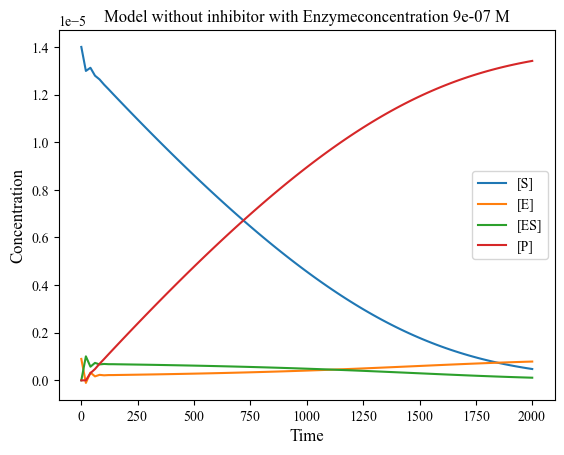

In [10]:
EK = EnzymeKinetics(4000,0.001,0.015,0,0,(14*10**-6),(9*10**-7),0,0,0,0)

for i in range(N-1):
    EK.euler(dt)
    
plot1("Without Inhibitor 1")

# Model with competitive inhibitor


\begin{equation}
\frac{dS}{dt}= -k_{1}SE + k_{2}A
\end{equation}

\begin{equation}
\frac{dE}{dt}= -k_{1}SE + k_{2}A + k_{3}A - k_{4}EI + k_{5}B
\end{equation}

\begin{equation}
\frac{dA}{dt}= k_{1}SE - k_{2}A - k_{3}A 
\end{equation}

\begin{equation}
\frac{dP}{dt}= k_{3}A 
\end{equation}

\begin{equation}
\frac{dI}{dt}= -k_{4}EI + k_{5}B
\end{equation}

\begin{equation}
\frac{dB}{dt}= k_{4}EI - k_{5}B
\end{equation}

# Simulation 2

__Simulation with inhibitorconcentration which corresponds to 1 inhibitormolecule per enzymemolecule.__

Final product concentration 9.58525592283723e-06


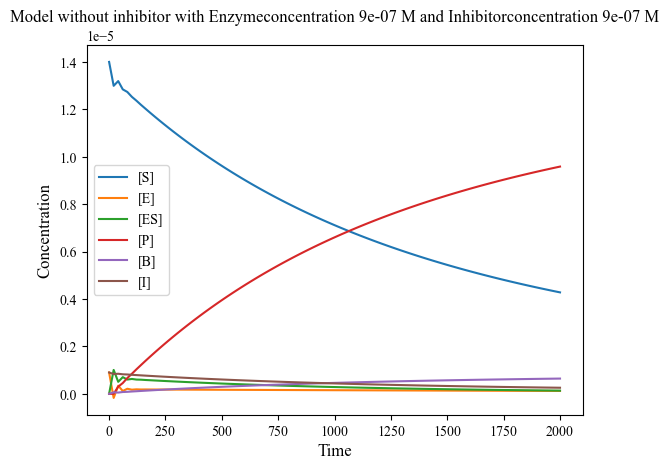

In [11]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(90*10**-8),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("With Inhibitor 2")

# Simulation 3

__Simulation with inhibitorconcentration corresponding to 50% inhibition of process in vitro.__

Final product concentration 1.0612781085060396e-05


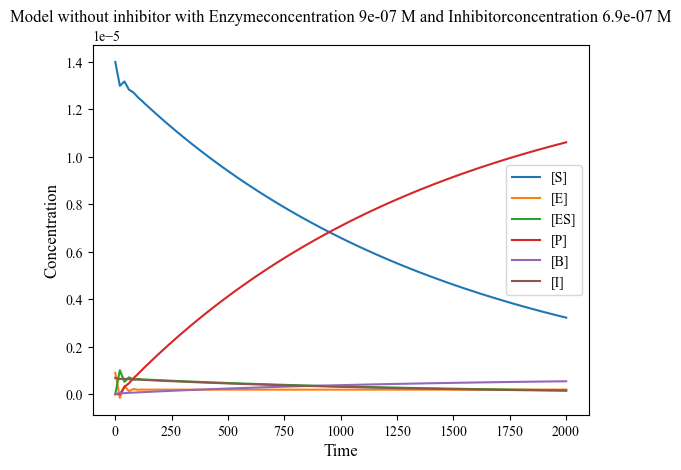

In [12]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(6.9*10**-7),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("With Inhibitor 3")

# Simulation 4

__Simulation with inhibitorconcentration which corresponds to Minimum Inhibitory Concentration.__

Final product concentration 1.3258407738127142e-05


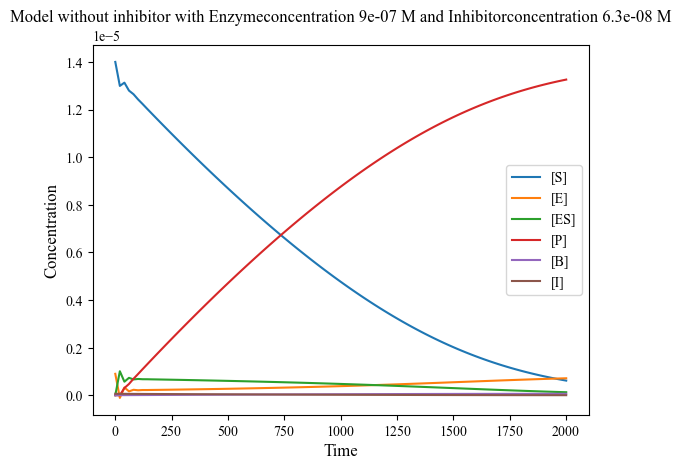

In [13]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(6.3*10**-8),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("With Inhibitor 4")